# preparing dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

from linear_regression import LinearRegression
from matplotlib.lines import Line2D

In [2]:
fifa = pd.read_csv('data.csv')
fifa = fifa.drop('Unnamed: 0,Name,Photo,Nationality,Flag,Club,Club Logo,Jersey Number,Joined,Real Face,Loaned From,Release Clause'.split(','), axis=1)
fifa = fifa.sample(n = 1500) 
fifa = fifa.reset_index()
del fifa['index']
fifa

,ID,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,224811,25,76,81,€8.5M,€1K,1714,Right,1.0,3.0,...,34.0,68.0,78.0,77.0,73.0,15.0,14.0,10.0,13.0,11.0
1,243816,21,64,74,€625K,€2K,1525,Right,1.0,3.0,...,46.0,58.0,67.0,64.0,63.0,13.0,14.0,6.0,12.0,6.0
2,231235,20,75,83,€8.5M,€17K,1857,Right,1.0,3.0,...,42.0,72.0,77.0,77.0,77.0,7.0,8.0,14.0,14.0,11.0
3,239401,19,60,75,€400K,€2K,1354,Right,1.0,3.0,...,44.0,46.0,61.0,63.0,61.0,6.0,13.0,8.0,13.0,11.0
4,233163,26,65,66,€625K,€1K,1719,Right,1.0,3.0,...,45.0,65.0,44.0,52.0,51.0,7.0,11.0,14.0,9.0,8.0
5,139057,36,68,68,€100K,€4K,1864,Right,2.0,4.0,...,48.0,74.0,60.0,70.0,69.0,16.0,11.0,10.0,15.0,13.0
6,245142,19,58,72,€270K,€1K,1490,Right,1.0,2.0,...,52.0,54.0,39.0,33.0,41.0,14.0,11.0,14.0,10.0,8.0
7,236572,18,66,80,€1.2M,€2K,1670,Left,1.0,2.0,...,42.0,63.0,68.0,65.0,60.0,8.0,12.0,6.0,9.0,13.0
8,242115,25,55,60,€100K,€1K,1209,Right,1.0,3.0,...,35.0,39.0,52.0,61.0,62.0,14.0,7.0,8.0,11.0,8.0
9,193768,26,69,71,€1M,€7K,1885,Right,1.0,3.0,...,50.0,70.0,64.0,70.0,67.0,6.0,15.0,12.0,6.0,14.0


In [3]:
def parse_money(s):
    if s.startswith('€'):
        s = s[1:]
    multiplier = None
    if s.endswith('M'):
        s = s[:-1]
        multiplier = 1e6
    elif s.endswith('B'):
        s = s[:-1]
        multiplier = 1e9
    elif s.endswith('K'):
        s = s[:-1]
        multiplier = 1e3
    f = float(s)
    if multiplier:
        f = f * multiplier
    return f

fifa['Value'] = fifa['Value'].apply(parse_money)
fifa['Wage'] = fifa['Wage'].apply(parse_money)
fifa[['Value', 'Wage']].head()

,Value,Wage
0,8500000.0,1000.0
1,625000.0,2000.0
2,8500000.0,17000.0
3,400000.0,2000.0
4,625000.0,1000.0


In [4]:
fifa[['Work Rate1', 'Work Rate2']] = fifa['Work Rate'].str.split('/', expand=True)
fifa = fifa.drop('Work Rate', axis=1)
fifa[['Work Rate1', 'Work Rate2']].head()

,Work Rate1,Work Rate2
0,Medium,Medium
1,Medium,Medium
2,Medium,High
3,Medium,Medium
4,High,High


In [5]:
def parse_date(s):
    if isinstance(s, str) and ',' in s:
        return float(s.split()[2])
    else:
        return float(s)
fifa['Contract Valid Until'] = fifa['Contract Valid Until'].apply(parse_date)
fifa['Contract Valid Until'].head()

0    2020.0
1    2021.0
2    2021.0
3    2020.0
4    2018.0
Name: Contract Valid Until, dtype: float64

In [6]:
def parse_height(s):
    if isinstance(s, float):
        return s
    f, i = s.split("'")
    return int(f)*12 + int(i)
fifa['Height'] = fifa['Height'].apply(parse_height)
fifa['Height'].head()



0    76.0
1    70.0
2    71.0
3    74.0
4    71.0
Name: Height, dtype: float64

In [7]:
def parse_weight(s):
    if isinstance(s, str) and s.endswith('lbs'):
        return float(s[:-3])
    return float(s)
fifa['Weight'] = fifa['Weight'].apply(parse_weight)
fifa['Weight'].head()



0    194.0
1    154.0
2    172.0
3    179.0
4    165.0
Name: Weight, dtype: float64

In [8]:
rating_cols = "LS, ST, RS, LW, LF, CF, RF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB".split(', ')
for col in rating_cols:
    fifa[[f"{col}1", f"{col}2"]] = fifa[col].str.split('+', expand=True)
    fifa[f"{col}1"] = fifa[f"{col}1"].astype('float')
    fifa[f"{col}2"] = fifa[f"{col}2"].astype('float')
    fifa = fifa.drop(col, axis=1)
fifa.head()

,ID,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,...,LB1,LB2,LCB1,LCB2,CB1,CB2,RCB1,RCB2,RB1,RB2
0,224811,25,76,81,8500000.0,1000.0,1714,Right,1.0,3.0,...,69.0,2.0,74.0,2.0,74.0,2.0,74.0,2.0,69.0,2.0
1,243816,21,64,74,625000.0,2000.0,1525,Right,1.0,3.0,...,63.0,2.0,61.0,2.0,61.0,2.0,61.0,2.0,63.0,2.0
2,231235,20,75,83,8500000.0,17000.0,1857,Right,1.0,3.0,...,73.0,2.0,74.0,2.0,74.0,2.0,74.0,2.0,73.0,2.0
3,239401,19,60,75,400000.0,2000.0,1354,Right,1.0,3.0,...,54.0,2.0,58.0,2.0,58.0,2.0,58.0,2.0,54.0,2.0
4,233163,26,65,66,625000.0,1000.0,1719,Right,1.0,3.0,...,61.0,2.0,58.0,2.0,58.0,2.0,58.0,2.0,61.0,2.0


In [9]:
def null_counts(df):
    for col in df.columns:
        print(f"{col} : {df[col].isnull().sum()}")
null_counts(fifa)

ID : 0
Age : 0
Overall : 0
Potential : 0
Value : 0
Wage : 0
Special : 0
Preferred Foot : 2
International Reputation : 2
Weak Foot : 2
Skill Moves : 2
Body Type : 2
Position : 2
Contract Valid Until : 27
Height : 2
Weight : 2
Crossing : 2
Finishing : 2
HeadingAccuracy : 2
ShortPassing : 2
Volleys : 2
Dribbling : 2
Curve : 2
FKAccuracy : 2
LongPassing : 2
BallControl : 2
Acceleration : 2
SprintSpeed : 2
Agility : 2
Reactions : 2
Balance : 2
ShotPower : 2
Jumping : 2
Stamina : 2
Strength : 2
LongShots : 2
Aggression : 2
Interceptions : 2
Positioning : 2
Vision : 2
Penalties : 2
Composure : 2
Marking : 2
StandingTackle : 2
SlidingTackle : 2
GKDiving : 2
GKHandling : 2
GKKicking : 2
GKPositioning : 2
GKReflexes : 2
Work Rate1 : 2
Work Rate2 : 2
LS1 : 157
LS2 : 157
ST1 : 157
ST2 : 157
RS1 : 157
RS2 : 157
LW1 : 157
LW2 : 157
LF1 : 157
LF2 : 157
CF1 : 157
CF2 : 157
RF1 : 157
RF2 : 157
RW1 : 157
RW2 : 157
LAM1 : 157
LAM2 : 157
CAM1 : 157
CAM2 : 157
RAM1 : 157
RAM2 : 157
LM1 : 157
LM2 : 157
LCM1

In [10]:
fifa = fifa[~fifa['ShortPassing'].isnull()]
null_counts(fifa)

ID : 0
Age : 0
Overall : 0
Potential : 0
Value : 0
Wage : 0
Special : 0
Preferred Foot : 0
International Reputation : 0
Weak Foot : 0
Skill Moves : 0
Body Type : 0
Position : 0
Contract Valid Until : 25
Height : 0
Weight : 0
Crossing : 0
Finishing : 0
HeadingAccuracy : 0
ShortPassing : 0
Volleys : 0
Dribbling : 0
Curve : 0
FKAccuracy : 0
LongPassing : 0
BallControl : 0
Acceleration : 0
SprintSpeed : 0
Agility : 0
Reactions : 0
Balance : 0
ShotPower : 0
Jumping : 0
Stamina : 0
Strength : 0
LongShots : 0
Aggression : 0
Interceptions : 0
Positioning : 0
Vision : 0
Penalties : 0
Composure : 0
Marking : 0
StandingTackle : 0
SlidingTackle : 0
GKDiving : 0
GKHandling : 0
GKKicking : 0
GKPositioning : 0
GKReflexes : 0
Work Rate1 : 0
Work Rate2 : 0
LS1 : 155
LS2 : 155
ST1 : 155
ST2 : 155
RS1 : 155
RS2 : 155
LW1 : 155
LW2 : 155
LF1 : 155
LF2 : 155
CF1 : 155
CF2 : 155
RF1 : 155
RF2 : 155
RW1 : 155
RW2 : 155
LAM1 : 155
LAM2 : 155
CAM1 : 155
CAM2 : 155
RAM1 : 155
RAM2 : 155
LM1 : 155
LM2 : 155
LCM1

In [11]:
fifa.loc[fifa['Position'].isnull(), 'Position'] = 'Unknown'
null_counts(fifa)

ID : 0
Age : 0
Overall : 0
Potential : 0
Value : 0
Wage : 0
Special : 0
Preferred Foot : 0
International Reputation : 0
Weak Foot : 0
Skill Moves : 0
Body Type : 0
Position : 0
Contract Valid Until : 25
Height : 0
Weight : 0
Crossing : 0
Finishing : 0
HeadingAccuracy : 0
ShortPassing : 0
Volleys : 0
Dribbling : 0
Curve : 0
FKAccuracy : 0
LongPassing : 0
BallControl : 0
Acceleration : 0
SprintSpeed : 0
Agility : 0
Reactions : 0
Balance : 0
ShotPower : 0
Jumping : 0
Stamina : 0
Strength : 0
LongShots : 0
Aggression : 0
Interceptions : 0
Positioning : 0
Vision : 0
Penalties : 0
Composure : 0
Marking : 0
StandingTackle : 0
SlidingTackle : 0
GKDiving : 0
GKHandling : 0
GKKicking : 0
GKPositioning : 0
GKReflexes : 0
Work Rate1 : 0
Work Rate2 : 0
LS1 : 155
LS2 : 155
ST1 : 155
ST2 : 155
RS1 : 155
RS2 : 155
LW1 : 155
LW2 : 155
LF1 : 155
LF2 : 155
CF1 : 155
CF2 : 155
RF1 : 155
RF2 : 155
RW1 : 155
RW2 : 155
LAM1 : 155
LAM2 : 155
CAM1 : 155
CAM2 : 155
RAM1 : 155
RAM2 : 155
LM1 : 155
LM2 : 155
LCM1

In [12]:
cat_columns = fifa.select_dtypes('object', 'category').columns
null_counts(fifa[cat_columns])

Preferred Foot : 0
Body Type : 0
Position : 0
Work Rate1 : 0
Work Rate2 : 0


In [13]:
fifa['Body Type'].value_counts()

Normal    876
Lean      516
Stocky    106
Name: Body Type, dtype: int64

In [14]:
fifa.loc[~fifa['Body Type'].isin(['Normal', 'Stocky', 'Lean']), 'Body Type'] = fifa['Body Type'].value_counts().index[0]
fifa['Body Type'].value_counts()

Normal    876
Lean      516
Stocky    106
Name: Body Type, dtype: int64

In [15]:
categoricals = fifa.select_dtypes('object')
for col in categoricals.columns:
    print(col)
    print("----------------------------")
    print(fifa[col].value_counts())

Preferred Foot
----------------------------
Right    1150
Left      348
Name: Preferred Foot, dtype: int64
Body Type
----------------------------
Normal    876
Lean      516
Stocky    106
Name: Body Type, dtype: int64
Position
----------------------------
ST     187
GK     155
CB     148
LM     107
CM     106
LB     101
RB     101
RM      84
CDM     75
CAM     72
LCB     71
RCB     49
RCM     40
LW      35
RW      31
LDM     30
LCM     27
RDM     24
RS      19
LS      14
CF       6
LWB      5
RWB      4
RAM      3
LF       2
LAM      1
RF       1
Name: Position, dtype: int64
Work Rate1
----------------------------
Medium    1032
High       387
Low         79
Name: Work Rate1, dtype: int64
Work Rate2
----------------------------
 Medium    1091
 High       268
 Low        139
Name: Work Rate2, dtype: int64


In [16]:
labels = ['Wage']
features = fifa.drop(labels, axis=1)
target = fifa['Wage']

In [17]:
cat_columns = features.select_dtypes('object', 'category').columns
num_columns = features.select_dtypes(exclude=['object', 'category']).columns

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_names):
        self.feature_names = feature_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.feature_names].values
    def get_feature_names(self):
        return self.feature_names

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
cat_selector = DataFrameSelector(cat_columns)
ohe = OneHotEncoder(sparse=False)
cat_pipeline = Pipeline([
    ('selector', cat_selector),
    ('ohe', ohe)
])

In [20]:
from sklearn.preprocessing import Imputer, StandardScaler
num_selector = DataFrameSelector(num_columns)
num_pipeline = Pipeline([
    ('selector', num_selector),
    ('imputer', Imputer(strategy='median')),
    ('scaler', StandardScaler())
])

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [21]:
from sklearn.pipeline import FeatureUnion
pipeline = FeatureUnion([
    ('cat_pipeline', cat_pipeline),
    ('num_pipeline', num_pipeline)
])



In [22]:
X_features = pipeline.fit_transform(features)
df_feature = pd.DataFrame(X_features) 
df_target = pd.DataFrame(target)
df_feature.head()

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.386194,-0.116326,1.683093,-0.116326,1.683093,-0.116326,1.683093,-0.116326,1.386194,-0.116326
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.713855,-0.116326,0.500336,-0.116326,0.500336,-0.116326,0.500336,-0.116326,0.713855,-0.116326
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.834419,-0.116326,1.683093,-0.116326,1.683093,-0.116326,1.683093,-0.116326,1.834419,-0.116326
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.294653,-0.116326,0.227392,-0.116326,0.227392,-0.116326,0.227392,-0.116326,-0.294653,-0.116326
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.489742,-0.116326,0.227392,-0.116326,0.227392,-0.116326,0.227392,-0.116326,0.489742,-0.116326


# implementation of methods in ET-lasso

In [23]:
#ET-lasso implementation
#calculating permuted features 
permuted_feature_1 = pd.DataFrame(np.random.permutation(df_feature.T))
permuted_feature_1 = permuted_feature_1.T
permuted_feature_1.head()
permuted_feature_1 = pd.DataFrame(permuted_feature_1) 

In [24]:
permuted_feature_2 = pd.DataFrame(np.random.permutation(df_feature.T))
permuted_feature_2 = permuted_feature_2.T
permuted_feature_2.head()

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,-0.642702,1.844666,-0.783866,0.0,-0.966933,0.271761,-0.116326,0.150921,0.0,0.011856,...,0.809388,-0.116326,-1.877491,-0.039905,0.011856,-0.116326,0.0,-0.783866,0.0,-1.084929
1,-0.433700,-0.745795,-1.335822,0.0,-0.534167,0.614206,-0.116326,0.028018,1.0,-1.408940,...,-0.045543,-0.116326,-0.459266,-0.903120,-1.408940,-0.116326,0.0,-1.335822,0.0,0.344767
2,0.663560,0.419912,0.320046,0.0,0.601841,0.545717,-0.116326,0.642532,0.0,0.130255,...,1.151360,-0.116326,0.675314,-1.118923,0.130255,-0.116326,0.0,0.320046,0.0,0.480928
3,-1.217458,0.873243,-2.108560,0.0,-1.183315,-0.687084,-0.116326,-0.893752,1.0,-1.764139,...,-1.071460,-0.116326,-0.459266,-1.334727,-1.764139,-0.116326,0.0,-2.108560,0.0,-0.744525
4,0.559059,-0.033418,0.430437,0.0,0.331363,0.751184,-0.116326,0.458178,0.0,0.485454,...,0.552909,-0.116326,-0.246533,0.175899,0.485454,-0.116326,0.0,0.430437,0.0,0.412848


In [25]:
#concat features and permuted features
result = pd.concat([df_feature, permuted_feature_1], axis=1, sort=False)

In [201]:
#finding lambda that make all covariates to be zero
from sklearn import linear_model

#X_train = result.to_numpy()
#y_train = target.to_numpy()

for alpha in range(12000,14000):
    clf = linear_model.Lasso(alpha)
    clf.fit(X_train,y_train)
    w = np.abs(clf.coef_[0:(2*p)])
    if w.any() == 0:
        print(alpha)
        break



13680


In [207]:
# at alpha = 13680 all betas are zero
for alpha in range(1000,13680):
    clf = linear_model.Lasso(alpha)
    clf.fit(X_train,y_train)
    w = np.abs(clf.coef_[p:(2*p)])
    if w.any() == 0:
        print(alpha)
        print(clf.coef_[p:(2*p)])
        break



2549
[ 0. -0.  0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0. -0.  0. -0.  0.  0. -0. -0.  0. -0.  0.  0.  0.  0.  0.
  0.  0.  0. -0. -0.  0.  0.  0. -0.  0.  0.  0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0. -0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0. -0.  0.  0.  0. -0.
  0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0.  0.  0.  0.  0.  0.  0.
  0. -0. -0.  0.  0.  0.  0.  0.  0.  0.]


In [212]:
#features that ET-lasso choose
selected = np.where(clf.coef_!= 0)
selected

(array([42, 44], dtype=int64),)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.314e+01, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 13 iterations, i.e. alpha=9.647e+00, with an active set of 13 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 13 iterations, i.e. alpha=9.647e+00, with an active set of 13 regressors, and the smallest cholesk

Computing regularization path using the coordinate descent lasso...


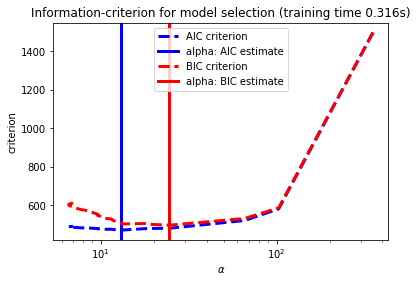

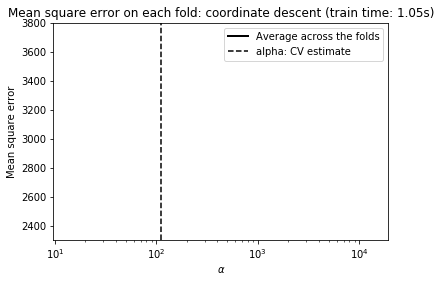

In [32]:
#implementation of AIC & BIC
#this way choose best regularization value to exclude bad feature 
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn import datasets

EPSILON = 1e-4
# #############################################################################
# LassoLarsIC: least angle regression with BIC/AIC criterion

model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X_train,y_train)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X_train, y_train)
alpha_aic_ = model_aic.alpha_


def plot_ic_criterion(model, name, color):
    criterion_ = model.criterion_
    plt.semilogx(model.alphas_ + EPSILON, criterion_, '--', color=color,
                 linewidth=3, label='%s criterion' % name)
    plt.axvline(model.alpha_ + EPSILON, color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel(r'$\alpha$')
    plt.ylabel('criterion')


plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection (training time %.3fs)'% t_bic)

# #############################################################################
# LassoCV: coordinate descent

# Compute paths
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
model = LassoCV(cv=20).fit(X_train, y_train)
t_lasso_cv = time.time() - t1

# Display results
plt.figure()
ymin, ymax = 2300, 3800
plt.semilogx(model.alphas_ + EPSILON, model.mse_path_, ':')
plt.plot(model.alphas_ + EPSILON, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(model.alpha_ + EPSILON, linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel(r'$\alpha$')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)



plt.show()

In [84]:
#implementation of Gaussian knockoff variables
# in this part we calculate the knockoffs which will append to main dataset 
tol=1e-8
n, p = X.shape
mu = X.mean(axis = 0) 
Sigma = np.cov(df_feature, rowvar=False)
Ds = np.diag(solve_sdp(Sigma,tol=tol))
SigmaInvDs = linalg.lstsq(Sigma,Ds)[0]
V = 2.0*Ds - np.dot(Ds, SigmaInvDs)
LV = np.linalg.cholesky(V+2*np.eye(p))
muTilde = X - np.dot(X-np.tile(mu,(n,1)), SigmaInvDs)
N = np.random.normal(size=muTilde.shape)
final = muTilde + np.dot(N,LV.T)

In [85]:
print(final)

           0         1         2         3         4         5         6    \
0     0.713537 -0.827405 -2.049057  2.911289  0.495782 -0.191450  3.579259   
1    -0.149099  0.427015  1.047578  0.238738  0.301729  1.193008 -0.593888   
2    -2.489608  1.387647 -1.613825 -0.705488  0.499619  1.964943 -0.379593   
3    -0.956144  1.626756 -0.032664  0.519822 -1.133257 -1.604275  0.898884   
4     1.879661  1.397781 -0.290012  2.690818  1.368041  0.927296  1.484240   
5     0.637572 -1.065407  0.724858  0.155653  0.535891  0.443475 -0.029576   
6    -1.333649  2.746281  5.199445 -0.121854 -1.289007 -1.641144 -0.588258   
7     3.080619 -0.353788  1.056513  0.080957  1.138920 -0.814499 -1.316440   
8    -1.348979  0.918537  2.188066 -0.930747  0.858174  0.356477  1.025835   
9     2.577374  1.019297 -1.152825  1.259034  1.269814  0.818036 -0.389911   
10   -1.749674  0.300664  0.607517  0.322839 -0.755695  0.822277  0.325718   
11   -0.082691 -0.468739  0.904541  0.551208 -1.277540 -0.813186

[1498 rows x 136 columns]


In [86]:
type(final)

pandas.core.frame.DataFrame

In [87]:
type(df_feature)

pandas.core.frame.DataFrame

In [89]:
#cancat dataset with kockoffs
X_concat = np.concatenate((df_feature,final),1)
X_concat.shape

(1498, 272)

In [93]:
#calculating proper regularization value 
# attention knockoff can't select features directly so we need lasso regularization

from sklearn import linear_model, datasets
lasso = linear_model.LassoCV()
X = df_feature.to_numpy() 
y = df_target.to_numpy()
lasso.fit(X, y)
LassoCV()
# The estimator chose automatically its lambda:
lasso.alpha_


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


90.00476186326964

In [94]:
lasso.coef_

array([-6.21703264e+02,  5.44696877e-13,  3.43070774e+02,  0.00000000e+00,
       -1.44968377e+03, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        3.64559798e+01,  0.00000000e+00, -6.68038495e+00,  9.44734899e+01,
       -1.80276191e+02, -0.00000000e+00, -5.10899571e+01,  4.98732662e+00,
        4.84550742e+02,  0.00000000e+00,  1.20758630e+04,  0.00000000e+00,
        3.41241803e+03,  2.47025674e+02,  0.00000000e+00, -6.34823053e+02,
        1.69166127e+02,  0.00000000e+00,  9.75065225e+02, -4.14884313e+02,
        5.79271644e+02, -

In [175]:
from sklearn import linear_model

clf = linear_model.Lasso(alpha=90)
clf.fit(X_concat,y_train)
print(clf.coef_)


[-7.59627565e+02  0.00000000e+00  5.29238436e+02  0.00000000e+00
 -1.70363364e+03  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  1.19222391e+02
 -0.00000000e+00 -0.00000000e+00 -9.89043791e+01  1.06193970e+02
  2.32192891e+02  0.00000000e+00  1.20988008e+04 -0.00000000e+00
  3.30665813e+03  2.92346950e+02  0.00000000e+00 -5.58161609e+02
  2.68480072e+02  0.00000000e+00  7.14239697e+02 -0.00000000e+00
  6.00556311e+02 -0.00000000e+00 -2.22888408e+02  0.00000000e+00
  0.00000000e+00 -8.20891174e+02 -3.83654563e+02  6.27809647e+02
  0.00000000e+00  4.54178

In [176]:
# calculating thresholds for knockoff
def kfilter(W, offset=1.0, q=0.1):
    t = np.insert(np.abs(W[W!=0]),0,0)
    t = np.sort(t)
    ratio = np.zeros(len(t));
    for i in range(len(t)):
        ratio[i] = (offset + np.sum(W <= -t[i])) / np.maximum(1.0, np.sum(W >= t[i]))   
    index = np.where(ratio <= q)[0]
    if len(index)==0:
        thresh = float('inf')
    else:
        thresh = t[index[0]]  
    return thresh

In [177]:
#differences between main features and knockoffs covariates
Z = np.zeros((2*p,))
Z = clf.coef_.squeeze()[0:]
W = np.abs(Z[0:p]) - np.abs(Z[p:(2*p)])

In [182]:
#choosing features based on between main features and knockoffs covariates and thresholds
def select(W, nominal_fdr=0.1):
    W_threshold = kfilter(W, q=nominal_fdr)
    selected = np.where(W >= W_threshold)[0]
    return selected

In [183]:
#selected feature by knockoffs
select(W,0.1)

array([ 0,  2,  4, 42, 44, 50, 52, 57, 59, 82, 85], dtype=int64)